# IDS Final Project
SHILOK KUMAR & AMMEN QURESHI

READING DATA

In [24]:
import json
import pandas as pd
import numpy as np

with open('electronics.json', 'r') as file:
    data = json.load(file)

df = pd.DataFrame(data)

DATA INFORMATION ABOUT THE DATA SET

In [25]:
print("----------------------[DATA INFORMATION]----------------------")
print(f"There are {df.size} cells/values in the provided dataset.")
rows, cols = df.shape
print(f"There are {rows} rows and {cols} columns in the provided Datasets.")
print(f"Dimensions of the Given Data : {df.ndim}")
mvalues = df.apply(lambda x: x=='').sum()
total = mvalues.sum()
print("Total Missing Values Across All Columns:", total)
print("DATA INFO: ")
df.info(verbose = False)

----------------------[DATA INFORMATION]----------------------
There are 19000 cells/values in the provided dataset.
There are 1000 rows and 19 columns in the provided Datasets.
Dimensions of the Given Data : 2
Total Missing Values Across All Columns: 664
DATA INFO: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 19 entries, Customer_ID to Will_Purchase_Next_Month
dtypes: int64(1), object(18)
memory usage: 148.6+ KB


DATA CLEANING

In [26]:
nullValues = df.apply(lambda x: x=='').sum()
print("THESE ARE THE COLUMNS OF THE DATASET WITH THE COUNT OF NULL VALUES")
print(nullValues)
print("Total Missing Values in The Provided DataSet :",nullValues.sum())

#replacing blank spaces with NA values 
df.replace("", pd.NA, inplace=True)

categorical=[
    "Customer_ID", 
    "Gender", 
    "Income_Level", 
    "Address", 
    "Transaction_ID", 
    "Product_ID", 
    "Product_Category", 
    "Brand", 
    "Purchase_Date", 
    "Product_Category_Preferences", 
    "Month", 
    "Season",   
]
numerical=[
    "Age", 
    "Purchase_Amount", 
    "Average_Spending_Per_Purchase", 
    "Purchase_Frequency_Per_Month", 
    "Brand_Affinity_Score", 
    "Year",
    "Will_Purchase_Next_Month"
]
#Replacing Null values is Categorical Data with Most Frequent Values and Numerical Data With Mean Values
for col in numerical:
    df[col] = pd.to_numeric(df[col], errors='coerce') 

df[numerical]=df[numerical].fillna(df[numerical].mean())
df[categorical] = df[categorical].apply(lambda col: col.fillna(col.mode()[0]))
print("Total Missing Values After Data Cleaning:",df.isna().sum().sum())


#Addressing Inconsistencies
df['Season'] = df['Season'].str.title()
seasons=['Fall','Winter','Spring','Summer']
df=df[df['Season'].isin(seasons)]

df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], errors='coerce') 
df['Income_Level']=df['Income_Level'].str.capitalize()



THESE ARE THE COLUMNS OF THE DATASET WITH THE COUNT OF NULL VALUES
Customer_ID                      32
Age                              33
Gender                           33
Income_Level                     41
Address                          32
Transaction_ID                   39
Purchase_Date                    35
Product_ID                       40
Product_Category                 44
Brand                            46
Purchase_Amount                  33
Average_Spending_Per_Purchase    26
Purchase_Frequency_Per_Month     37
Brand_Affinity_Score             47
Product_Category_Preferences     31
Month                            40
Year                             39
Season                           36
Will_Purchase_Next_Month          0
dtype: int64
Total Missing Values in The Provided DataSet : 664
Total Missing Values After Data Cleaning: 0


REMOVING OUTLIERS USING IQR METHOD: 

In [ ]:
def removeOutliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    iqr = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * iqr
    upper_bound = Q3 + 1.5 * iqr
    print(f"{column}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")

    outliers=(df[column]<lower_bound)|(df[column]> upper_bound)

    print(f"Outliers:",outliers.value_counts())
    
    mean = df[column].mean()
    print(f"Mean value: {mean}")
    
    # Replacing the outliers with the mean value
    df.loc[outliers, column] = mean
    return df

for column in numerical:
    df=removeOutliers(df,column)
    print('\n')


Age
Lower Bound: -11.5
Upper Bound: 112.5
Outliers: Age
False    988
Name: count, dtype: int64
Mean value: 49.75661057692308


Purchase_Amount
Lower Bound: -211.0
Upper Bound: 717.0
Outliers: Purchase_Amount
False    988
Name: count, dtype: int64
Mean value: 251.1156208891557


Average_Spending_Per_Purchase
Lower Bound: -36.625
Upper Bound: 140.375
Outliers: Average_Spending_Per_Purchase
False    988
Name: count, dtype: int64
Mean value: 51.54000189777329


Purchase_Frequency_Per_Month
Lower Bound: -4.5
Upper Bound: 15.5
Outliers: Purchase_Frequency_Per_Month
False    988
Name: count, dtype: int64
Mean value: 5.442914979757085


Brand_Affinity_Score
Lower Bound: -4.5
Upper Bound: 15.5
Outliers: Brand_Affinity_Score
False    988
Name: count, dtype: int64
Mean value: 5.371258078841734


Year
Lower Bound: 1946.875
Upper Bound: 2047.875
Outliers: Year
False    988
Name: count, dtype: int64
Mean value: 1996.9433198380566


Will_Purchase_Next_Month
Lower Bound: 1.0
Upper Bound: 1.0
Outliers:

C:\Users\admin\AppData\Local\Temp\ipykernel_6452\1259811910.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.868421052631579' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outliers, column] = mean


# EDA

UNIVARIATE ANALYSIS:

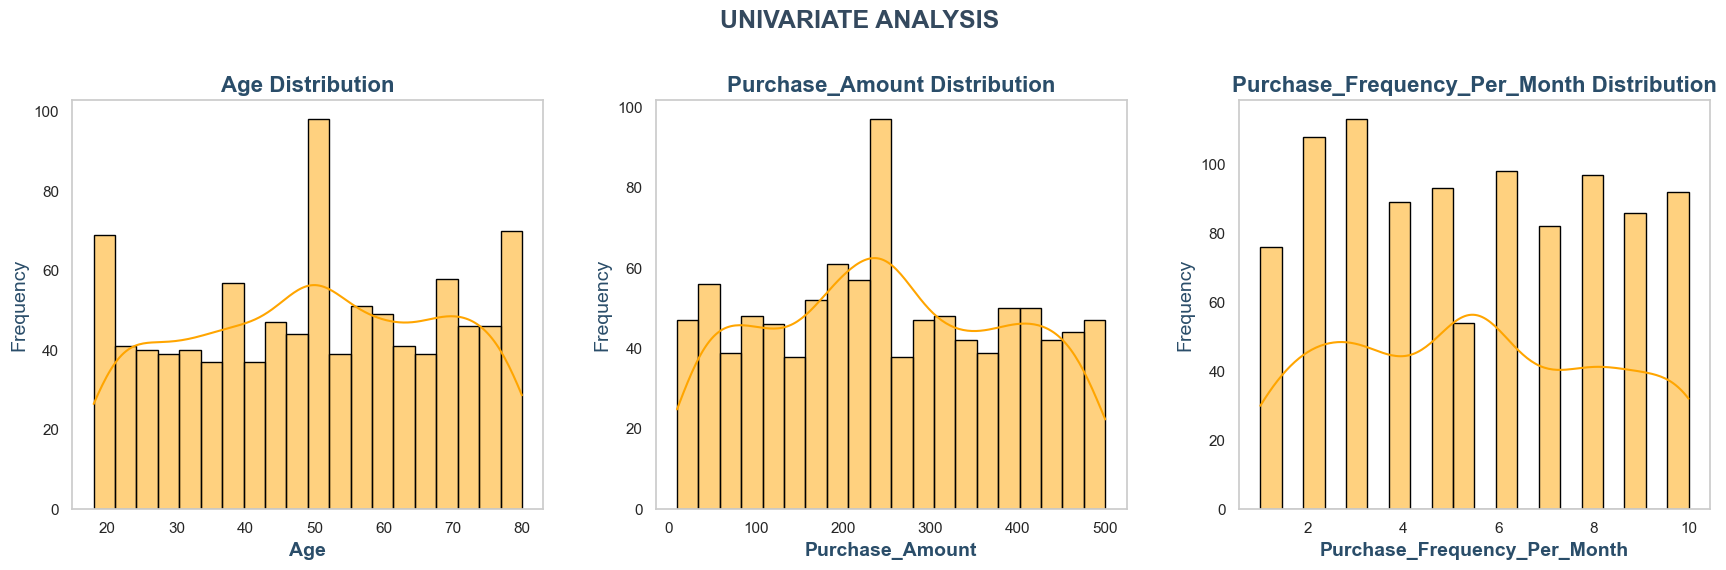

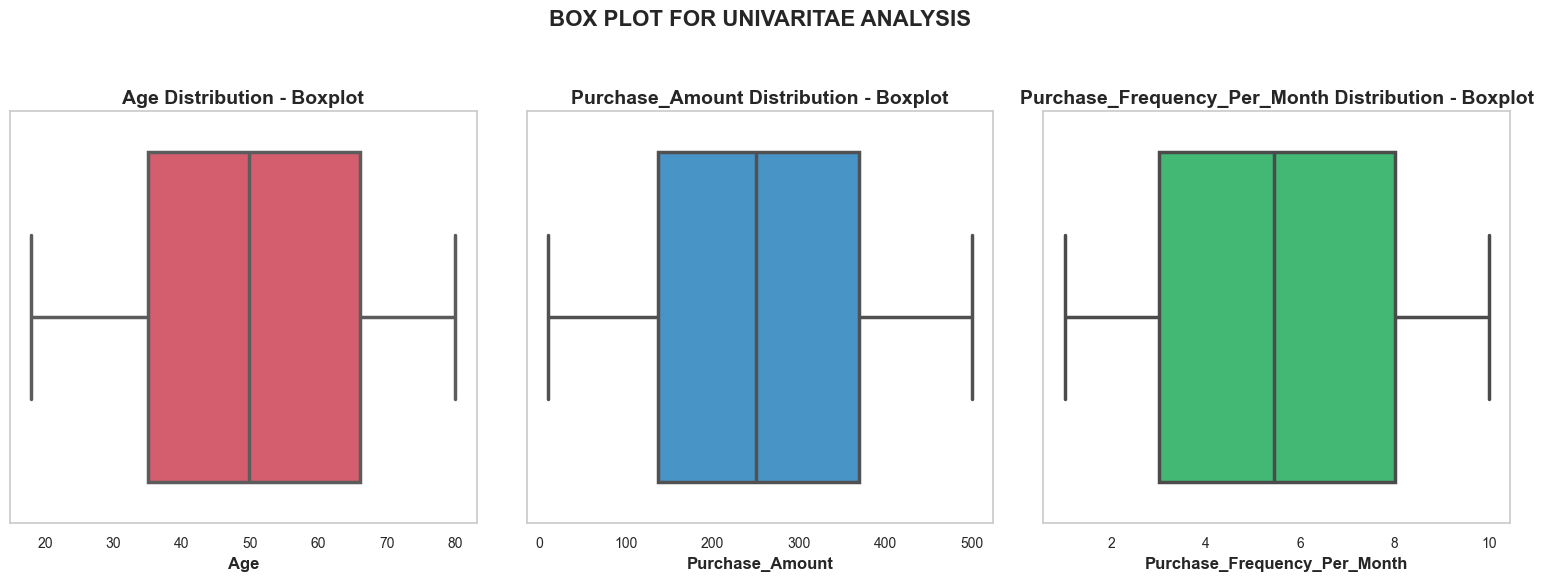

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

features=['Age','Purchase_Amount','Purchase_Frequency_Per_Month']

sns.set_theme(style="whitegrid", palette="muted")
plt.figure(figsize=(18, 6))

for i,feature in enumerate(features,1):
    plt.subplot(1, 3, i)  #(row,col,index)
    
    ax = sns.histplot(data=df, x=feature, bins=20, kde=True, color='orange', edgecolor='black')
    ax.set_title(f'{feature} Distribution', fontsize=16, weight='bold',color='#2a4d69')
    ax.set_xlabel(feature, fontsize=14, weight='bold', color='#2a4d69')
    ax.set_ylabel('Frequency', fontsize=14, color='#2a4d69')
    plt.grid(False) 

plt.tight_layout(pad=3.0)
plt.suptitle('UNIVARIATE ANALYSIS',fontsize=18,weight='bold',color='#34495e',y=1.0)

plt.subplots_adjust(top=0.85)
plt.show()

colors=['#e84a5f','#3498db','#2ecc71']
sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 6))

for i, feature in enumerate(features):
    plt.subplot(1,3,i+1)  #(row,column,plot)
    sns.boxplot(x=df[feature],color=colors[i],linewidth=2.5)
    plt.title(f'{feature} Distribution - Boxplot',fontsize=14,weight='bold')
    plt.xlabel(feature,fontsize=12,weight='bold')
    plt.xticks(fontsize=10)
    plt.grid(False)

plt.tight_layout(pad=3.0)
plt.suptitle('BOX PLOT FOR UNIVARITAE ANALYSIS',fontsize=16,weight='bold',y=1.02)

# Show the plot
plt.subplots_adjust(top=0.85)
plt.show()

BIVARIATE ANALYSIS: